References: \\
https://www.hondacengkareng.com/harga-jasa-servis-sepeda-motor-honda-jakarta-tangerang/
https://www.wahanahonda.com/assets/upload/buku_service/service-honda-beat.pdf
https://www.gridoto.com/read/222506817/disebut-minim-perawatan-ternyata-motor-listrik-viar-q1-enggak-perlu-servis-berkala
https://www.gridoto.com/read/222051242/dibanding-aki-motor-berapa-lama-usia-pakai-baterai-di-motor-listrik
https://dataindonesia.id/digital/detail/berapa-pendapatan-pengemudi-ojek-online-setiap-hari
https://dataindonesia.id/ekonomi-digital/detail/berapa-pendapatan-pengemudi-ojek-online-setiap-hari

\\
DIASUMSIKAN BAHWA \\
1. BATERAI VIAR DIGANTI SETIAP 1000 KALI PENGECASAN
2. VIAR MEMEERLUKAN SERVIS TIAP 8 BULAN ATAU TIAP 8KM (2X LEBIH RELIABLE DIBANDING BEAT)
3. VIAR MEMILIKI ONGKOS SERVIS 30RIBU RUPIAH (VIAR MEMILIKI +- 1/3 PART BEAT YG PERLU DISERVIS)
4. JADWAL SERVIS DISAMAKAN MENYESUAIKAN ASUMSI
\


In [ ]:
#period to simulate
y = 5

#distance scenario
d1_dod=40
d2_dod=55
d3_dod=85
d4_dod=125

#work time
W_hd = 8
W_dw = 6
W_dm = 26
W_dy = 312

#service cost
beat_service_p = 95000
beat_service_h = 4
newq1_service_p = 35000
newq1_service_h = 2

#battery
maxcharge_n = 1000
battery_c = 1380
battery_p = 7600000
charge_h = 4.5
charge_d = 60

#fuel price
gas_p = 8237.50
electricity_p = 1.44470

#price
beat_p=18500000
newq1_p=21000000

#tax rate
beat_tr = 0.02
newq1_tr = 0.0125

#co2 tax
co2_kgkm = 0.143/1000
co2_pkg = 75

earnings_cust = 12500
flag_p = 10700
flag_d = 4
distance_p = 2400

inf_rate = 0.0423

#*Dependencies*

In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=8370ffb059967d818ec3a845d118a777c458020869e598da265a03c6c72854e6
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
from fitter import Fitter, get_common_distributions, get_distributions


# Modelling: $ Fuel \; Cost $

##Distribution Test (Gas Return)

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 13.32it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,13109.940269,10.733267,101.067076,inf,0.215504,0.469704
norm,13431.528253,-95.580114,101.406353,inf,0.269519,0.217714
lognorm,13454.033683,-97.434477,104.068849,inf,0.293007,0.146906
gamma,13455.075564,-97.971759,104.069933,inf,0.292711,0.147669
rayleigh,13509.006404,-110.511488,101.486878,inf,0.324274,0.082394
exponpow,13567.707856,-109.615820,104.186639,inf,0.397397,0.016610
uniform,13615.520282,-155.701539,101.596831,inf,0.395238,0.017505
expon,13671.682742,-90.067540,101.654460,inf,0.409179,0.012402
chi2,13676.310500,33.729607,104.298256,inf,0.564357,0.000098
powerlaw,13988.949145,-42.741598,104.614691,inf,0.559240,0.000118


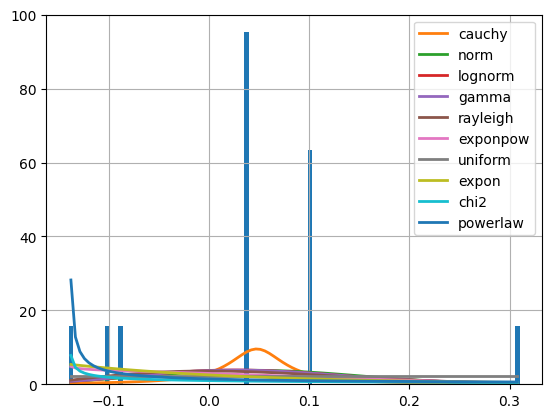

In [ ]:
data = {'%/y': [-0.1, 0.1, 0.1, 0.1, 0.1, 0.31, -0.14, -0.09, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]}
gas_r = pd.DataFrame(data)
gsr = Fitter(gas_r["%/y"].values,
            distributions= get_common_distributions())
gsr.fit()
gsr.summary(10)

In [ ]:
gsr.get_best(method = 'ks_statistic')

{'cauchy': {'loc': 0.04773479080200195, 'scale': 0.03330017566680912}}

##Distribution Test (Electricity Return)

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 15.69it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,5.058531e+06,-445.379156,113.095486,inf,0.562727,0.006437
chi2,5.059796e+06,-388.646330,113.097486,inf,0.521068,0.015144
powerlaw,5.064016e+06,-521.633896,113.104155,inf,0.689684,0.000257
lognorm,5.090661e+06,-650.219659,113.146139,inf,0.333844,0.268703
gamma,5.094954e+06,-652.671582,113.152882,inf,0.325673,0.295244
uniform,5.097222e+06,-697.311579,111.077001,inf,0.416667,0.090123
rayleigh,5.099765e+06,-663.568919,111.080991,inf,0.377272,0.156823
expon,5.108317e+06,-635.161473,111.094395,inf,0.391775,0.128909
norm,5.112422e+06,-657.051008,111.100821,inf,0.397272,0.119388
cauchy,5.208333e+06,7747.365763,111.249514,inf,0.341723,0.244829


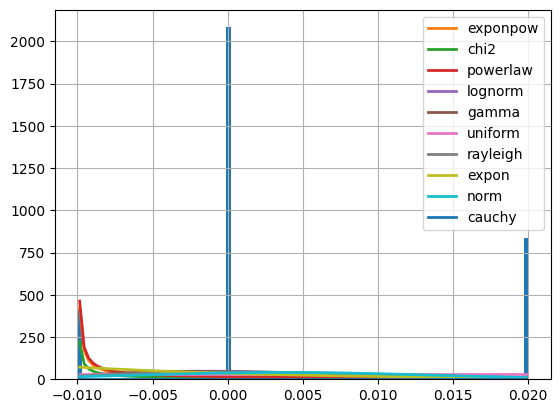

In [ ]:
data = {'%/y': [-0.01, 0.02, 0, 0, 0, 0.02, 0, 0]}
elec_r = pd.DataFrame(data)
elr = Fitter(elec_r["%/y"].values,
            distributions= get_common_distributions())
elr.fit()
elr.summary(10)

In [ ]:
elr.get_best(method = 'ks_statistic')

{'gamma': {'a': 2.784679337899292,
  'loc': -0.013390354057329447,
  'scale': 0.006155205513225227}}

##Distribution Test (Beat Consumption)

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 23.21it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,4.166480e+07,-842.685684,213.963653,inf,0.183254,0.669662
gamma,4.234221e+07,-924.119426,216.828499,inf,0.196941,0.582231
norm,4.234775e+07,-917.850483,214.191272,inf,0.194985,0.594596
rayleigh,4.246940e+07,-936.795132,214.231435,inf,0.199955,0.563328
uniform,4.332023e+07,-992.202571,214.509137,inf,0.360390,0.039067
expon,4.352278e+07,-923.718879,214.574442,inf,0.318396,0.092291
chi2,4.405029e+07,-616.688489,217.382166,inf,0.542757,0.000216
exponpow,4.407133e+07,-605.064334,217.388851,inf,0.564500,0.000097
lognorm,4.419349e+07,-866.506685,217.427603,inf,0.334957,0.066668
powerlaw,4.502491e+07,-882.937325,217.688541,inf,0.550111,0.000166


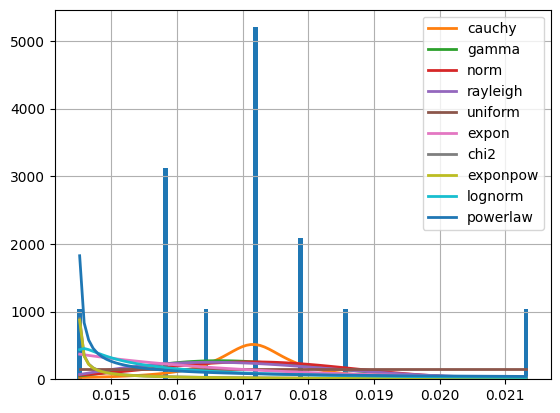

In [ ]:
data = {'lt/KM': [0.0213498622589532, 0.018543956043956, 0.0157967032967033, 0.0157967032967033, 0.0157967032967033, 0.0178571428571429, 0.0171939477303989, 0.0144827586206897, 0.0172057811424639, 0.0172057811424639, 0.0171821305841924, 0.0178940123881624, 0.0164722031571723, 0.0172176308539945]}
beat_cons = pd.DataFrame(data)
bec = Fitter(beat_cons["lt/KM"].values,
            distributions= get_common_distributions())
bec.fit()
bec.summary(10)

In [ ]:
bec.get_best(method = 'ks_statistic')

{'cauchy': {'loc': 0.017157223428443114, 'scale': 0.0006176648381430985}}

##Distribution Test (New Q1 Consumption)

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.75it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,18.281274,519.758440,9.561961,inf,0.150088,8.898680e-01
norm,18.815865,439.046138,9.936662,inf,0.158359,8.511054e-01
lognorm,18.817196,441.036002,12.502531,inf,0.159896,8.433635e-01
gamma,18.825716,440.856017,12.508416,inf,0.165677,8.128621e-01
uniform,18.979041,402.839074,10.048916,inf,0.213181,5.272562e-01
rayleigh,19.053319,434.059859,10.099694,inf,0.238319,3.895887e-01
expon,19.485890,464.209838,10.391535,inf,0.366694,4.487743e-02
powerlaw,20.012524,511.646207,13.303164,inf,0.595043,6.362905e-05
chi2,22.787572,639.676013,14.991306,inf,0.732426,1.201645e-07
exponpow,23.570712,689.479300,15.430571,inf,0.755788,3.177146e-08


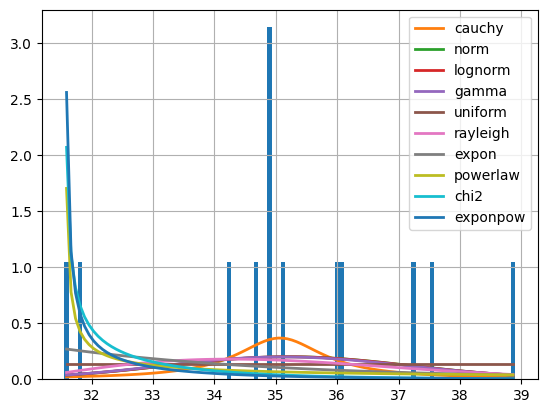

In [ ]:
data = {'wh/KM': [31.5540540540541, 37.534435261708, 36.1072902338377, 31.7962835512732, 38.9003436426117, 34.9173553719008, 34.8933241569167, 36.0192837465565, 34.6418732782369, 34.8965517241379, 37.2508591065292, 34.2503438789546, 35.1239669421488]}
newq1_cons = pd.DataFrame(data)
nq1c = Fitter(newq1_cons["wh/KM"].values,
           distributions= get_common_distributions())
nq1c.fit()
nq1c.summary(10)

In [ ]:
nq1c.get_best(method = 'ks_statistic')

{'cauchy': {'loc': 35.06657217335925, 'scale': 0.8643172008138678}}

##Beat Street

$ (Gas) \; Fuel \; Cost_{(YoY)} = \left( \sum_{d = 1}^{d_{(YoY)}}G_{d} \right) \times p_{G}(1+R_{G})$  \
\
  * $ G_{d} \sim \mathcal{C}(0.017, 0.000617) = \text{distance gas consumption} $ \
  * $ d_{(YoY)} = \text{distance (year to year)} $ \
  * $ p_{G} = \text{gas price} $ \
  * $ R_{G} \sim \mathcal{C}(0.047,  0.033) = \text{return of gas} $ \


In [ ]:
def beat_fuel_cost(d_dod, period):
  result = np.zeros(period)
  for i in range(period):
    rv_Gd = stats.cauchy(loc=0.017157223428443114, scale=0.0006176648381430985).rvs(d_dod*W_dy)
    rv_RG = stats.cauchy(loc=0.04773479080200195, scale=0.03330017566680912).rvs(1)

    rv_Gd = rv_Gd[rv_Gd >= 0]
    Q1 = np.percentile(rv_Gd, 25)
    Q3 = np.percentile(rv_Gd, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    rv_Gd = rv_Gd[(rv_Gd >= lower_bound) & (rv_Gd <= upper_bound)]

    #formula
    fuel_consumption_yoy = np.sum(rv_Gd)
    gas_price = gas_p * (1+rv_RG)

    result[i] = fuel_consumption_yoy * gas_price

  return np.insert(result, 0, 0)


##Viar New Q1

$ (Electricity) \; Fuel \; Cost_{(YoY)} = \left( \sum_{d = 1}^{d_{(YoY)}}E_{d} \right) \times p_{E}(1+R_{E})$  \
\
  * $ E_{d} \sim \mathcal{C}(35.07, 0.86) = \text{distance energy consumption} $ \
  * $ d_{(YoY)} = \text{distance (year to year)} $ \
  * $ p_{E} = \text{electricity price} $ \
  * $ R_{E} \sim \mathcal{\gamma}(2.784, -0.013, 0.006) = \text{return of electricity} $ \



In [ ]:
def newq1_fuel_cost(d_dod, period):
  result = np.zeros(period)
  for i in range(period):
    rv_Ed = stats.cauchy(loc=35.06657217335925, scale=0.8643172008138678).rvs(d_dod*W_dy)
    rv_RG = stats.cauchy(loc=0.04773479080200195, scale=0.03330017566680912).rvs(1)

    rv_Ed = rv_Ed[rv_Ed >= 0]
    Q1 = np.percentile(rv_Ed, 25)
    Q3 = np.percentile(rv_Ed, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    rv_Ed = rv_Ed[(rv_Ed >= lower_bound) & (rv_Ed <= upper_bound)]

    #formula
    energy_consumption_yoy = np.sum(rv_Ed)
    electricity_price = electricity_p * (1+rv_RG)

    result[i] = energy_consumption_yoy * electricity_price

  return np.insert(result, 0, 0)

#Modelling: $ Replacement \; Cost $

##Viar New Q1

$ Replacement \; Cost_{(PoP)} = ( P_{u} - 1 )p_{B} $  \

\
  * $ P_{u} =
  \begin{cases}
      1, & \text{if }\quad \dfrac {\sum_{d = 1}^{d_{(PoP)}}E_{d}}{B_{E} \times n_{max}} \leq 1 \\\\
      \dfrac {\sum_{d = 1}^{d_{(PoP)}}E_{d}}{B_{E} \times n_{max}}, & \text{if }\quad \dfrac {\sum_{d = 1}^{d_{(PoP)}}E_{d}}{B_{E} \times n_{max}} > 1
  \end{cases} $ \
  \
  \
    * $ P_{u} = \text{proportion of energy usage} $
    * $ E_{d} \sim \mathcal{C}(35.07, 0.86) = \text{distance energy consumption} $ \
    * $ d_{(PoP)} = \text{distance (period to period)} $ \
    * $ B_{E} = \text{energy at full battery}$ \
    * $ n_{max} = \text{battery maximum charge} $ \
    * $ p_{B} = \text{battery price} $ \

In [ ]:
def newq1_replacement_cost(d_dod, period):
  result = np.zeros(period)
  for i in range(period):
    rv_Ed = stats.cauchy(loc=35.06657217335925, scale=0.8643172008138678).rvs(period*d_dod*W_dy)

    rv_Ed = rv_Ed[rv_Ed >= 0]
    Q1 = np.percentile(rv_Ed, 25)
    Q3 = np.percentile(rv_Ed, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    rv_Ed = rv_Ed[(rv_Ed >= lower_bound) & (rv_Ed <= upper_bound)]

    #formula
    energy_consumption_yoy = np.sum(rv_Ed)

    if energy_consumption_yoy / (battery_c * maxcharge_n) > 1:
        proportion_of_usage = energy_consumption_yoy / (battery_c * maxcharge_n)
    else:
        proportion_of_usage = 1

    change_battery_amount = math.ceil(proportion_of_usage - 1)

    #cashflowing
    if change_battery_amount == 0:
      result[i] =  0
    elif i % (period / change_battery_amount) < 1:
      result[i] =  battery_p
    else:
      result[i] =  0

  return np.insert(result, 0, 0)

#Modelling: $Maintenance \; Cost $

##Beat Street

$ Maintenance\;Cost_{(YoY)} =  \left( \dfrac{n_S}{W_{y}} \right) p_{S} $ \
\
* $ n_{S} =
\begin{cases}
    n_{SS}[|\min (d_{SS}-d_{total}|], & \text{if }\quad d_{SS} \leq d_{(SoS)} \\\\
    n_{SS}[|\min (m_{SS}-W_{m})|], & \text{if }\quad d_{SS} > d_{(SoS)}
\end{cases} $
\
\
$ n_{S} = \text{number of total services} $ \
$ n_{SS} = \text{number of services in schedule} $ \
$ d_{SS} = \text{distance in schedule} $ \
$ d_{total} = \text{distance total} $ \
$ d_{(SoS)} = \text{distance (service to service)} $ \
$ m_{SS} = \text{month in schedule} $ \
$ W_{y} = \text{total work time (year)} $ \
$ W_{m} = \text{total work time (month)} $ \
$ p_{S} = \text{service price} $ \

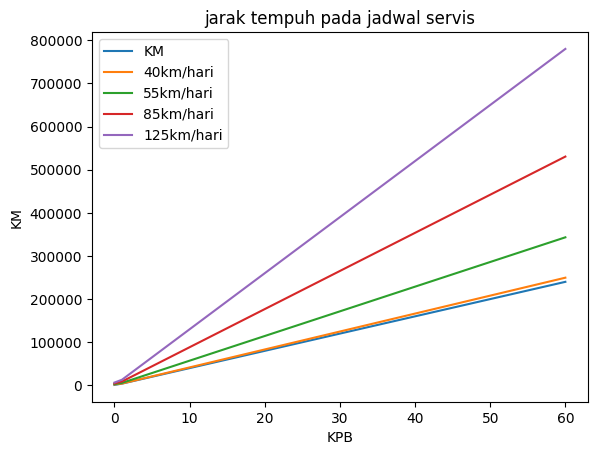

In [ ]:
#generating data servis
data_servis = pd.DataFrame({'KPB': range(1, 62)})
data_servis['BULAN'] = data_servis['KPB'].apply(lambda x: 2 if x-1 == 0 else (x-1)*4 if x-1 != 0 else None)
data_servis['KM'] = data_servis['BULAN'].apply(lambda x: 1000 if x == 2 else x*1000 if x != 2 else None)
data_servis['jt_40'] = data_servis['BULAN'].apply(lambda x: x*W_dm*d1_dod)
data_servis['jt_55'] = data_servis['BULAN'].apply(lambda x: x*W_dm*d2_dod)
data_servis['jt_85'] = data_servis['BULAN'].apply(lambda x: x*W_dm*d3_dod)
data_servis['jt_125'] = data_servis['BULAN'].apply(lambda x: x*W_dm*d4_dod)

plt.plot(data_servis['KM'], label='KM')
plt.plot(data_servis['jt_40'], label='40km/hari')
plt.plot(data_servis['jt_55'], label='55km/hari')
plt.plot(data_servis['jt_85'], label='85km/hari')
plt.plot(data_servis['jt_125'], label='125km/hari')

plt.xlabel('KPB')
plt.ylabel('KM')
plt.title('jarak tempuh pada jadwal servis')

plt.legend()
plt.show()

In [ ]:
def beat_maintenance_cost(d_dod, period):
  total_distance = period*W_dy*d_dod
  closest_value = data_servis['KM'].apply(lambda x: abs(x - total_distance)).idxmin()
  number_of_service = data_servis.loc[closest_value, 'KPB']

  result = np.zeros(period)
  for i in range(period):
    #formula
    result[i] =  (number_of_service / period) * beat_service_p
  return np.insert(result,0,0)

In [ ]:
beat_maintenance_cost(130,10 )

array([     0., 579500., 579500., 579500., 579500., 579500., 579500.,
       579500., 579500., 579500., 579500.])

##Viar New Q1

$ Maintenance\;Cost_{(YoY)} =  \left( \dfrac{n_S}{W_{y}} \right) p_{S} $ \
\
* $ n_{S} =
\begin{cases}
    n_{SS}[|\min (d_{SS}-d_{total}|], & \text{if }\quad d_{SS} \leq d_{(SoS)} \\\\
    n_{SS}[|\min (m_{SS}-W_{m})|], & \text{if }\quad d_{SS} > d_{(SoS)}
\end{cases} $
\
\
$ n_{S} = \text{number of total services} $ \
$ n_{SS} = \text{number of services in schedule} $ \
$ d_{SS} = \text{distance in schedule} $ \
$ d_{total} = \text{distance total} $ \
$ d_{(SoS)} = \text{distance (service to service)} $ \
$ m_{SS} = \text{month in schedule} $ \
$ W_{y} = \text{total work time (year)} $ \
$ W_{m} = \text{total work time (month)} $ \
$ p_{S} = \text{service price} $ \

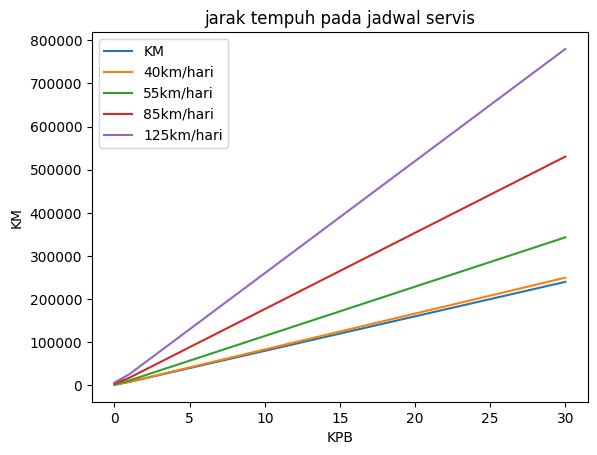

In [ ]:
#generating data servis
data_servis = pd.DataFrame({'KPB': range(1, 32)})
data_servis['BULAN'] = data_servis['KPB'].apply(lambda x: 2 if x-1 == 0 else (x-1)*8 if x-1 != 0 else None)
data_servis['KM'] = data_servis['BULAN'].apply(lambda x: 1000 if x == 2 else x*1000 if x != 2 else None)
data_servis['jt_40'] = data_servis['BULAN'].apply(lambda x: x*W_dm*d1_dod)
data_servis['jt_55'] = data_servis['BULAN'].apply(lambda x: x*W_dm*d2_dod)
data_servis['jt_85'] = data_servis['BULAN'].apply(lambda x: x*W_dm*d3_dod)
data_servis['jt_125'] = data_servis['BULAN'].apply(lambda x: x*W_dm*d4_dod)

plt.plot(data_servis['KM'], label='KM')
plt.plot(data_servis['jt_40'], label='40km/hari')
plt.plot(data_servis['jt_55'], label='55km/hari')
plt.plot(data_servis['jt_85'], label='85km/hari')
plt.plot(data_servis['jt_125'], label='125km/hari')

plt.xlabel('KPB')
plt.ylabel('KM')
plt.title('jarak tempuh pada jadwal servis')

plt.legend()
plt.show()

In [ ]:
def newq1_maintenance_cost(d_dod, period):
  total_distance = period*W_dy*d_dod
  closest_value = data_servis['KM'].apply(lambda x: abs(x - total_distance)).idxmin()
  number_of_service = data_servis.loc[closest_value, 'KPB']

  result = np.zeros(period)
  for i in range(period):
    #formula
    result[i] =  (number_of_service / period) * beat_service_p
  return np.insert(result,0,0)

In [ ]:
newq1_maintenance_cost(130,10 )

array([     0., 294500., 294500., 294500., 294500., 294500., 294500.,
       294500., 294500., 294500., 294500.])

# Modelling: $ Purchase \; Cost $

##Beat Street

In [ ]:
def beat_purchase_cost(period):
  result = np.zeros(period)
  return np.insert(result, 0, beat_p)

##Viar New Q1

In [ ]:
def newq1_purchase_cost(period):
  result = np.zeros(period)
  return np.insert(result, 0, newq1_p)

# Modelling: $ Vehicle \; Tax $

##Beat Street

In [ ]:
def beat_vehicle_tax(period):
  result = np.zeros(period)
  for i in range(period):
    result[i] = beat_p * beat_tr
  return np.insert(result, 0, 0)

##Viar New Q1

In [ ]:
def newq1_vehicle_tax(period):
  result = np.zeros(period)
  for i in range(period):
    result[i] = newq1_p * newq1_tr
  return np.insert(result, 0, 0)

# Modelling: $ CO_{2} \; Tax $

##Beat Street

In [ ]:
def beat_co2_tax(d_dod, period):
  result = np.zeros(period)
  for i in range(period):
    result[i] = co2_kgkm * W_dy * d_dod * co2_pkg
  return np.insert(result, 0, 0)


# Modelling: $ Revenue $

##Distribution Test (Dialy Customer)

In [ ]:
data = {'Revenue': ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '>250k'],
        'Prob': [0.2272, 0.501, 0.1944, 0.0531, 0.0134, 0.0109],
        'D_Rev': [40000, 75000, 125000, 175000, 225000, 260000]}
dialy_rev = pd.DataFrame(data)
dialy_rev['Ass_Customer'] = dialy_rev['D_Rev'].apply(lambda x: round(x/earnings_cust))
dialy_rev['n_100'] = dialy_rev['Prob'].apply(lambda x: round(x*100))
dialy_rev['Result'] = dialy_rev['Ass_Customer'] * dialy_rev['n_100']
print(dialy_rev)

     Revenue    Prob   D_Rev  Ass_Customer  n_100  Result
0       <50k  0.2272   40000             3     23      69
1   50k-100k  0.5010   75000             6     50     300
2  100k-150k  0.1944  125000            10     19     190
3  150k-200k  0.0531  175000            14      5      70
4  200k-250k  0.0134  225000            18      1      18
5      >250k  0.0109  260000            21      1      21


Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.41it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,9.450073,865.163088,-218.775280,inf,0.603593,4.545980e-35
gamma,9.511035,911.645944,-218.138684,inf,0.569577,6.797547e-31
exponpow,9.856098,710.246481,-214.610560,inf,0.260514,2.043565e-06
chi2,10.018896,862.797190,-212.988685,inf,0.446909,1.497805e-18
expon,10.052817,748.539893,-217.249185,inf,0.318590,1.951729e-09
lognorm,10.169785,762.426214,-211.508819,inf,0.288763,8.372784e-08
rayleigh,10.170904,848.547041,-216.093046,inf,0.318265,2.037657e-09
norm,10.214685,904.662538,-215.667811,inf,0.324369,8.992359e-10
uniform,10.451787,582.074352,-213.396103,inf,0.570707,5.005954e-31
cauchy,10.760429,10031.950740,-210.514960,inf,0.267677,9.396376e-07


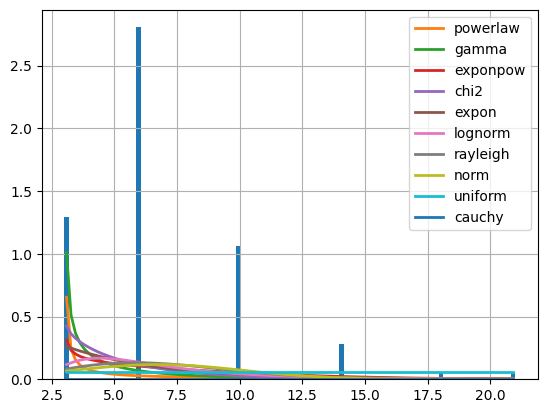

In [ ]:
dialyrev = [3] * 23 + [6] * 50 + [10] * 19 + [14] * 5 + [18] * 1 + [21] * 1
drv = Fitter(dialyrev,
           distributions= get_common_distributions())
drv.fit()
drv.summary(10)

In [ ]:
drv.get_best(method = 'ks_statistic')

{'exponpow': {'b': 0.7300706047206689,
  'loc': 2.9999999999999996,
  'scale': 7.763192444393945}}

##Beat Street

$ Revenue_{(YoY)}= Availability_{(YoY)}\times Pot.Revenue_{(YoY)} $

\
*
$ Availability_{(YoY)} = \dfrac{W_{t/y}-S_{t/y}}{W_{t/y}} $ \
\
  * $ W_{t/y} = \text{working time/year} = W_{h/d} \times W_{d/y}$ \
  * $ S_{t/y} = \text{service time/year} = S_{h} \times S_{n/y}$ \

\
*
$ Pot.Revenue_{(YoY)} = W_{d/y}\times n_{(DoD)} \left (\left (\bar{d}_{(DoD)}  - flag(d) \right )p_{d} + p_{flag}\right) $ \
\
  * $ n_{(DoD)} \sim \text{ExpPow}(0.73, 3, 7.76) = \text{amount of customer (day to day)} $
  * $ \bar{d}_{(DoD)} = \text{average distance/customer (day to day)} $ \
  \
  $ \bar{d}_{(DoD)} =
  \begin{cases}
      0, & \text{if }\quad \dfrac{d_{(DoD)}}{n_{(DoD)}} \leq flag(d) \\\\
      \dfrac{d_{(DoD)}}{n_{(DoD)}}, & \text{if }\quad \dfrac{d_{(DoD)}}{n_{(DoD)}} > flag(d)
  \end{cases} $

  \
  * $ flag(d) = \text{distance limit for flagfall} $ \
  * $ p_{d} = \text{distance price} $ \
  * $ p_{flag} = \text{flagfall price} $ \

In [ ]:
def beat_revenue(d_dod, period):
  result = np.zeros(period)
  for i in range(period):

    rv_ndod = stats.exponpow(b=0.7300706047206689, loc=2.9999999999999996, scale=7.763192444393945).rvs(W_dy)

    rv_ndod = rv_ndod[rv_ndod >= 0]
    Q1 = np.percentile(rv_ndod, 25)
    Q3 = np.percentile(rv_ndod, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    rv_ndod = rv_ndod[(rv_ndod >= lower_bound) & (rv_ndod <= upper_bound)]

    total_distance = period*W_dy*d_dod
    closest_value = data_servis['KM'].apply(lambda x: abs(x - total_distance)).idxmin()
    services_time_yoy = (data_servis.loc[closest_value, 'KPB']/5) * beat_service_h

    #formula
    availability = (W_hd * W_dy - services_time_yoy) / (W_hd * W_dy)

    if (W_dy * d_dod)/sum(rv_ndod) <= flag_d:
      pot_revenue = sum(rv_ndod) * flag_p
    else:
      pot_revenue = sum(rv_ndod) * (((W_dy * d_dod)/sum(rv_ndod)-flag_d) * distance_p + flag_p)

    result[i] = availability * pot_revenue

  return np.insert(result, 0, 0)


##Viar New Q1

$ Revenue_{(YoY)}= Availability_{(YoY)}\times Pot.Revenue_{(YoY)} $

\
*
$ Availability_{(YoY)} = \dfrac{W_{t/y}-S_{t/y}-C_{t/y}}{W_{t/y}} $ \
\
  * $ W_{t/y} = \text{working time/year} = W_{h/d} \times W_{d/y}$ \
  * $ S_{t/y} = \text{service time/year} = S_{h} \times S_{n/y}$ \

  * $ C_{t/y} = \text{charging time/year} = \sum_{W_d = 1}^{W_{d/y}} C_{h} \times \left \lfloor Cs \right \rfloor $\
  \
  $ C_{h} \sim \mathcal{N}(4.5, 0.5)= \text{charging hour}  $ \
  $ Cs = \text{consumption} $ \
  \
  $ Cs =
  \begin{cases}
      \dfrac{d_{(DoD)}}{B_{d}}-1, & \text{if }\quad d_{(DoD)}\mod B_{d} = 0 \\\\
      \dfrac{d_{(DoD)}}{B_{d}}, & \text{if }\quad d_{(DoD)}\mod B_{d} \neq 0
  \end{cases} $
  \
  \
  $ d_{(DoD)} = \text{distance travel (day to day)} $ \
  $ B_{d} = \text{battery distance coverage} $ \

\
*
$ Pot.Revenue_{(YoY)} = W_{d/y}\times n_{(DoD)} \left (\left (\bar{d}_{(DoD)}  - flag(d) \right )p_{d} + p_{flag}\right) $ \
\
  * $ n_{(DoD)} \sim \text{ExpPow}(0.73, 3, 7.76) = \text{amount of customer (day to day)} $
  * $ \bar{d}_{(DoD)} = \text{average distance/customer (day to day)} $ \
  \
  $ \bar{d}_{(DoD)} =
  \begin{cases}
      0, & \text{if }\quad \dfrac{d_{(DoD)}}{n_{(DoD)}} \leq flag(d) \\\\
      \dfrac{d_{(DoD)}}{n_{(DoD)}}, & \text{if }\quad \dfrac{d_{(DoD)}}{n_{(DoD)}} > flag(d)
  \end{cases} $

  \
  * $ flag(d) = \text{distance limit for flagfall} $ \
  * $ p_{d} = \text{distance price} $ \
  * $ p_{flag} = \text{flagfall price} $ \

In [ ]:
def newq1_revenue(d_dod, period):
  result = np.zeros(period)
  for i in range(period):

    rv_ndod = stats.exponpow(b=0.7300706047206689, loc=2.9999999999999996, scale=7.763192444393945).rvs(W_dy)
    rv_ch = stats.norm(loc=4.5, scale=0.5).rvs(W_dy)

    rv_ndod = rv_ndod[rv_ndod >= 0]
    Q1 = np.percentile(rv_ndod, 25)
    Q3 = np.percentile(rv_ndod, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    rv_ndod = rv_ndod[(rv_ndod >= lower_bound) & (rv_ndod <= upper_bound)]

    total_distance = period*W_dy*d_dod
    closest_value = data_servis['KM'].apply(lambda x: abs(x - total_distance)).idxmin()
    services_time_yoy = (data_servis.loc[closest_value, 'KPB']/5) * beat_service_h

    if d_dod % charge_d == 0:
      consumption = d_dod / charge_d - 1
    else:
      consumption = d_dod / charge_d

    charging_time_yoy = sum(rv_ch) * math.floor(consumption)

    #formula
    availability = (W_hd * W_dy - services_time_yoy - charging_time_yoy) / (W_hd * W_dy)
    if (W_dy * d_dod)/sum(rv_ndod) <= flag_d:
      pot_revenue = sum(rv_ndod) * flag_p
    else:
      pot_revenue = sum(rv_ndod) * (((W_dy * d_dod)/sum(rv_ndod)-flag_d) * distance_p + flag_p)

    result[i] = availability * pot_revenue

  return np.insert(result, 0, 0)

# Modelling: $ Resale \; Revenue $

##Beat Street

In [ ]:
def beat_resale_revenue(d_dod, period):
  result = np.zeros(period)
  return np.insert(result, period, 18387883.93 - 1182986.84 *  period - 3.187896512 * W_dy * d_dod * period)

##Viar New Q1

In [ ]:
def newq1_resale_revenue(d_dod, period):
  result = np.zeros(period)
  return np.insert(result, period, 27080796.42 - 2917236.48 *  period - 16.35441332 * W_dy * d_dod * period)

# Modelling: $ NPV \; and \; Replication $

In [ ]:
def beat_cashflow(d_dod, period):
  result = beat_revenue(d_dod, period) + beat_resale_revenue(d_dod, period) - beat_fuel_cost(d_dod, period) - newq1_replacement_cost(d_dod, period) - beat_maintenance_cost(d_dod, period) -  beat_purchase_cost(period) - beat_vehicle_tax(period) - beat_co2_tax(d_dod, period)
  return result

def npv(cashflow, rate):
  npv = 0
  for i in range(len(cashflow)):
      npv += cashflow[i] / (1 + rate) ** i
  return npv

def beat_replication(replication, d_dod, period, rate):
  rep_npv = []
  for _ in range(replication):
    cashflow = beat_cashflow(d_dod, period)
    bnpv = npv(cashflow, rate)
    rep_npv.append(bnpv/(d_dod*W_dy))
  return rep_npv

def beat_meanreplication(replication, d_dod, period, rate):
  rep_npv = []
  for _ in range(replication):
    cashflow = beat_cashflow(d_dod, period)
    bnpv = npv(cashflow, rate)
    rep_npv.append(bnpv/(d_dod*W_dy))
  return np.mean(rep_npv)


In [ ]:
rep_n = 200

bskenario1 = beat_replication(rep_n, d1_dod, y, 0.04)
bskenario2 = beat_replication(rep_n, d2_dod, y, 0.04)
bskenario3 = beat_replication(rep_n, d3_dod, y, 0.04)
bskenario4 = beat_replication(rep_n, d4_dod, y, 0.04)

In [ ]:
beat_rep = pd.DataFrame({'replication': range(1, rep_n+1)})

beat_rep['bS1'] = bskenario1
beat_rep['bS2'] = bskenario2
beat_rep['bS3'] = bskenario3
beat_rep['bS4'] = bskenario4

In [ ]:
def newq1_cashflow(d_dod, period):
  result = newq1_revenue(d_dod, period) + newq1_resale_revenue(d_dod, period) - newq1_fuel_cost(d_dod, period) - newq1_replacement_cost(d_dod, period) - newq1_maintenance_cost(d_dod, period) -  newq1_purchase_cost(period) - newq1_vehicle_tax(period)
  return result

def npv(cashflow, rate):
  npv = 0
  for i in range(len(cashflow)):
      npv += cashflow[i] / (1 + rate) ** i
  return npv

def newq1_replication(replication, d_dod, period, rate):
  rep_npv = []
  for _ in range(replication):
    cashflow = newq1_cashflow(d_dod, period)
    qnpv = npv(cashflow, rate)
    rep_npv.append(qnpv/(d_dod*W_dy))
  return rep_npv

def newq1_meanreplication(replication, d_dod, period, rate):
  rep_npv = []
  for _ in range(replication):
    cashflow = newq1_cashflow(d_dod, period)
    qnpv = npv(cashflow, rate)
    rep_npv.append(qnpv/(d_dod*W_dy))
  return np.mean(rep_npv)


In [ ]:
qskenario1 = newq1_replication(rep_n, d1_dod, y, 0.04)
qskenario2 = newq1_replication(rep_n, d2_dod, y, 0.04)
qskenario3 = newq1_replication(rep_n, d3_dod, y, 0.04)
qskenario4 = newq1_replication(rep_n, d4_dod, y, 0.04)

In [ ]:
newq1_rep = pd.DataFrame({'replication': range(1, rep_n+1)})

newq1_rep['qS1'] = qskenario1
newq1_rep['qS2'] = qskenario2
newq1_rep['qS3'] = qskenario3
newq1_rep['qS4'] = qskenario4

In [ ]:
combined_df = pd.concat([beat_rep, newq1_rep], axis=1)

combined_df['comp1'] = combined_df.apply(lambda row: 'beat' if row['bS1'] > row['qS1'] else 'new q1', axis=1)
combined_df['comp2'] = combined_df.apply(lambda row: 'beat' if row['bS2'] > row['qS2'] else 'new q1', axis=1)
combined_df['comp3'] = combined_df.apply(lambda row: 'beat' if row['bS3'] > row['qS3'] else 'new q1', axis=1)
combined_df['comp4'] = combined_df.apply(lambda row: 'beat' if row['bS4'] > row['qS4'] else 'new q1', axis=1)

combined_df.head(200)

,replication,bS1,bS2,bS3,bS4,replication,qS1,qS2,qS3,qS4,comp1,comp2,comp3,comp4
0,1,9463.232185,9618.720332,9511.996983,9212.106687,1,9638.763420,9809.588702,3473.794000,-2727.572041,new q1,new q1,beat,beat
1,2,9472.528661,9617.646192,9460.909535,9305.589775,2,9622.882600,9786.211879,3540.008512,-2737.092122,new q1,new q1,beat,beat
2,3,9489.232636,9600.924484,9512.345437,9294.028124,3,9570.758857,9820.189489,3482.074904,-2767.810152,new q1,new q1,beat,beat
3,4,9524.155874,9633.940132,9536.449500,9304.813544,4,9596.028116,9799.431649,3484.869606,-2788.985159,new q1,new q1,beat,beat
4,5,9454.619113,9611.458733,9493.746391,9321.289072,5,9627.572397,9788.220638,3486.117244,-2759.267864,new q1,new q1,beat,beat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,9476.488845,9573.175257,9485.696631,9311.807292,196,9651.138138,9809.739707,3515.804338,-2698.883184,new q1,new q1,beat,beat
196,197,9445.380734,7511.489936,9508.402371,8858.005935,197,9639.166936,9788.530900,3514.683659,-2715.790968,new q1,new q1,beat,beat
197,198,9434.887103,9641.688271,9496.719879,9290.703647,198,9646.376987,9820.569038,3429.176451,-2708.933589,new q1,new q1,beat,beat
198,199,9496.584666,9555.356895,9554.054374,9296.787112,199,9624.243827,9817.460583,3510.211160,-2707.350675,new q1,new q1,beat,beat


##Result

In [ ]:
comparison1 = combined_df['comp1'].value_counts()
comparison1

new q1    191
beat        9
Name: comp1, dtype: int64

In [ ]:
comparison2 = combined_df['comp2'].value_counts()
comparison2

new q1    192
beat        8
Name: comp2, dtype: int64

In [ ]:
comparison3 = combined_df['comp3'].value_counts()
comparison3

beat      199
new q1      1
Name: comp3, dtype: int64

In [ ]:
comparison4 = combined_df['comp4'].value_counts()
comparison4

beat    200
Name: comp4, dtype: int64

Text(0, 0, '55km')

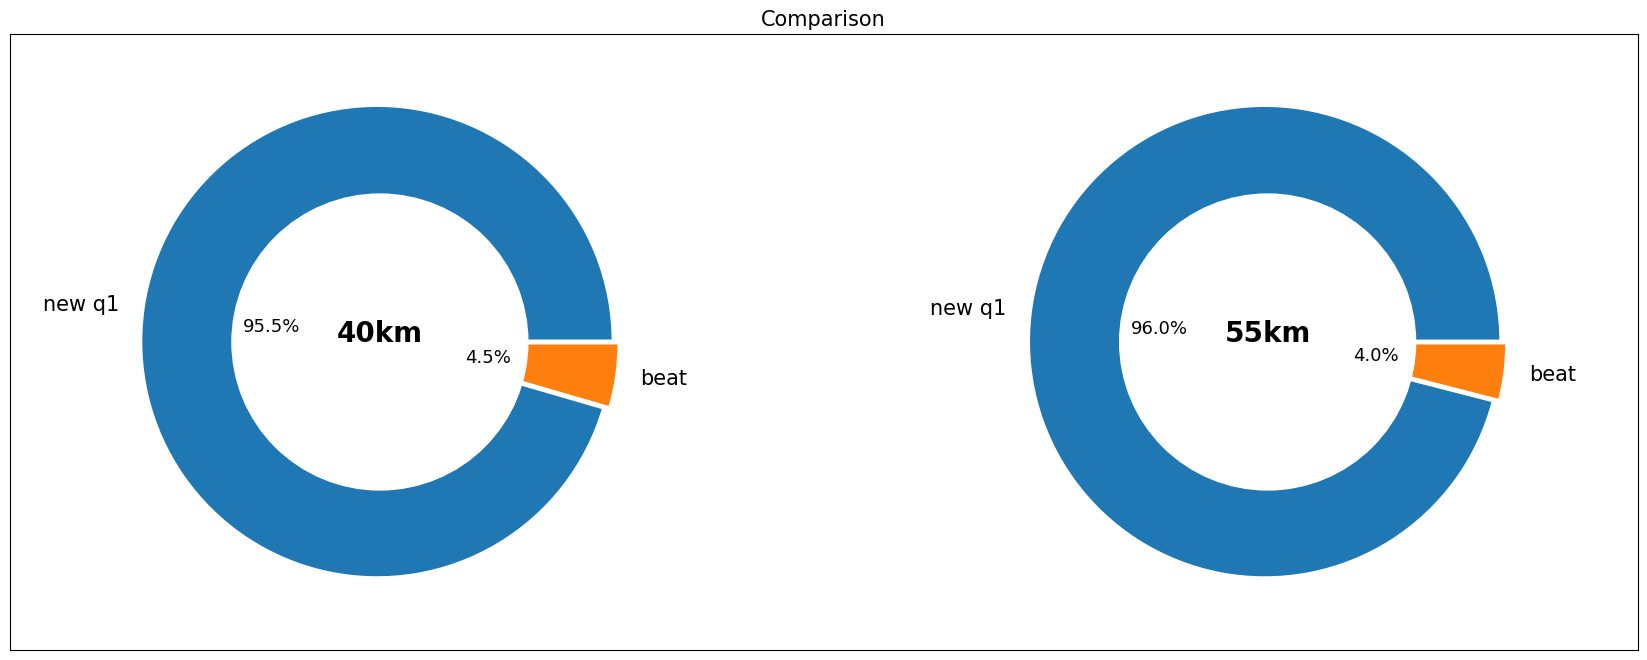

In [ ]:
fig = plt.figure(figsize=(21,8))
plt.title("Comparison",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks


# skenario 1
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01)

wedges, texts, autotexts =  ax1.pie(comparison1,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['new q1', 'beat'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=13)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'40km',size=20,color='#000000',horizontalalignment='center',weight='bold')


# skenario 2
ax1 = fig.add_subplot(122)
ax1.axis('equal')
explode = (0.01,0.01)

wedges, texts, autotexts =  ax1.pie(comparison2,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['new q1', 'beat'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=13)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'55km',size=20,color='#000000',horizontalalignment='center',weight='bold')

In [ ]:
distance_per_day = range(20,150)
replic = 100

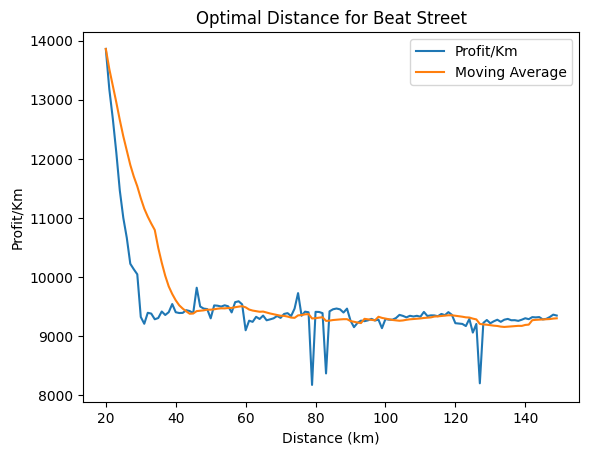

In [ ]:
results_b = []
for d in distance_per_day:
    profit_per_km = beat_meanreplication(replic, d, y, inf_rate)
    results_b.append(profit_per_km)

df_b = pd.DataFrame({'Distance': distance_per_day, 'Profit/Km': results_b})
rolling_avg_b = df_b['Profit/Km'].rolling(window=15, min_periods=1).mean()

plt.plot(distance_per_day, results_b, label='Profit/Km')
plt.plot(distance_per_day, rolling_avg_b, label='Moving Average')
plt.xlabel("Distance (km)")
plt.ylabel("Profit/Km")
plt.title("Optimal Distance for Beat Street")
plt.legend()
plt.show()

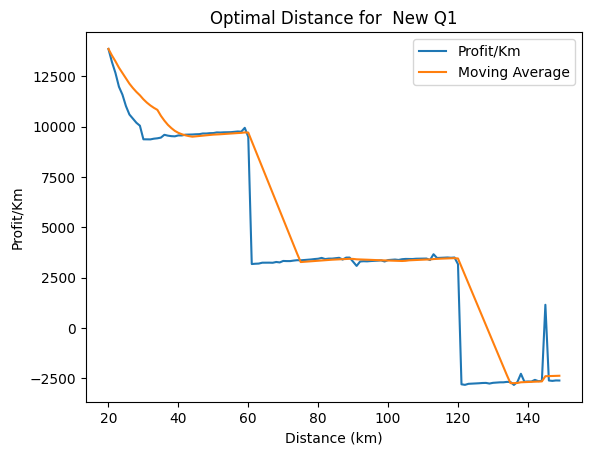

In [ ]:
results_q = []
for d in distance_per_day:
    profit_per_km = newq1_meanreplication(replic, d, y, inf_rate)
    results_q.append(profit_per_km)

df_q = pd.DataFrame({'Distance': distance_per_day, 'Profit/Km': results_q})
rolling_avg_q = df_q['Profit/Km'].rolling(window=15, min_periods=1).mean()

plt.plot(distance_per_day, results_q, label='Profit/Km')
plt.plot(distance_per_day, rolling_avg_q, label='Moving Average')
plt.xlabel("Distance (km)")
plt.ylabel("Profit/Km")
plt.title("Optimal Distance for  New Q1")
plt.legend()
plt.show()

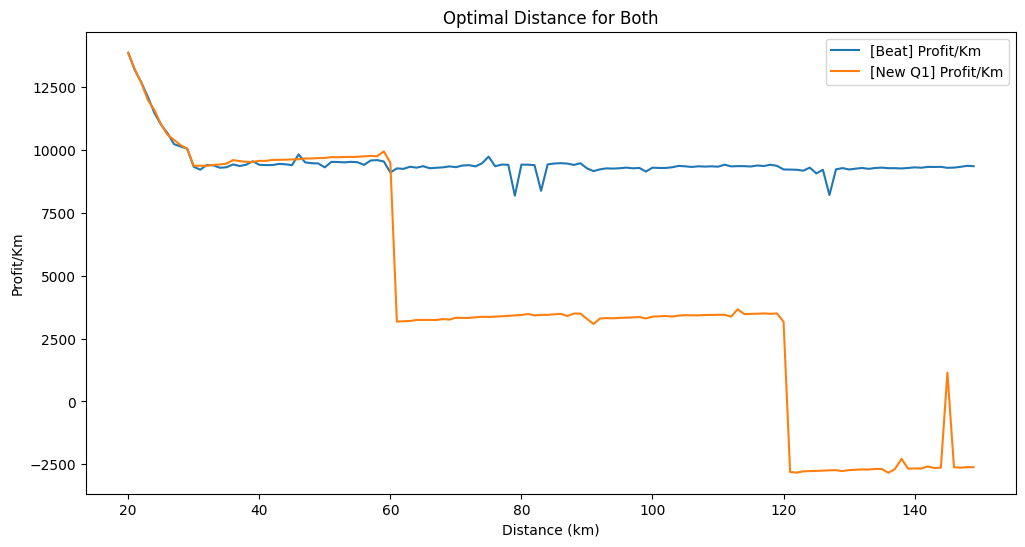

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(distance_per_day, results_b, label='[Beat] Profit/Km')
#plt.plot(distance_per_day, rolling_avg_b, label='[Beat] Moving Average')
plt.plot(distance_per_day, results_q, label='[New Q1] Profit/Km')
#plt.plot(distance_per_day, rolling_avg_q, label='[New Q1] Moving Average')

plt.xlabel("Distance (km)")
plt.ylabel("Profit/Km")
plt.title("Optimal Distance for Both")
plt.legend()
plt.show()